In [1]:
import os
os.chdir('/g/data/w28/ym7079/Hackthon/DOC/hk25-AusNode-DOCmeso')
import sys
sys.path.insert(0,os.getcwd())
import xarray as xr
import utils
import utils.util_calc.doc_metrics.i_org.i_org_calc as doc
import numpy as np

In [15]:
f = xr.open_dataset('/scratch/nf33/hk25_DOCmeso/ICON_interp/ICON_pr_z10_2020-04-01_MarCont.nc')
conv_regions = f['pr'][0,:,:]
cores = np.loadtxt('/g/data/w28/ym7079/Hackthon/DOC/hk25-AusNode-DOCmeso/get_metrics/Yinglin/2020-04-01.txt')
core_snap0 = cores[cores[:, 0] == 0] # until 673 for the first snapshot
f.close()

In [16]:
print(np.shape(core_snap0))

(673, 3)


In [3]:
conv_regions.lat
conv_regions.lon

<xarray.DataArray 'lon' (lon: 490)> Size: 2kB
array([100.049995, 100.15    , 100.25    , ..., 148.75    , 148.84999 ,
       148.95    ], dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2020-04-01
  * lon      (lon) float32 2kB 100.0 100.2 100.2 100.3 ... 148.8 148.8 148.9

In [4]:
obs_cdf, n, NN_distances, r = doc.get_cdf(core_lat,core_lon)

In [5]:
poisson_cdf = doc.get_poisson_cdf(conv_regions.lat,conv_regions.lon,n, NN_distances, r)

In [13]:
i_org = doc.get_i_org(conv_regions.lat,conv_regions.lon, core_lat, core_lat) #this is not right
#i_org = np.trapz(obs_cdf,poisson_cdf) # should be this 

In [14]:
print(i_org)

9.932854511306042e-07


In [10]:
print(np.trapz(obs_cdf,poisson_cdf))

0.8359870893903514


In [11]:
import matplotlib.pyplot as plt

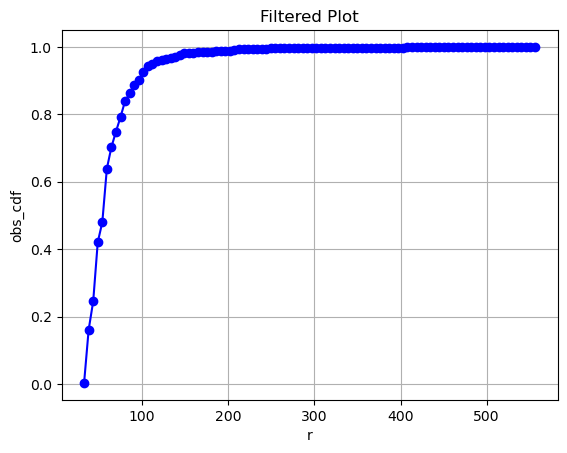

In [12]:
#mask = r <= 2000  # create mask
#plt.plot(r[mask], obs_cdf[mask], color='blue', marker='o')
plt.plot(r, obs_cdf, color='blue', marker='o')
plt.xlabel('r')
plt.ylabel('obs_cdf')
plt.title('Filtered Plot')
plt.grid(True)
plt.show()

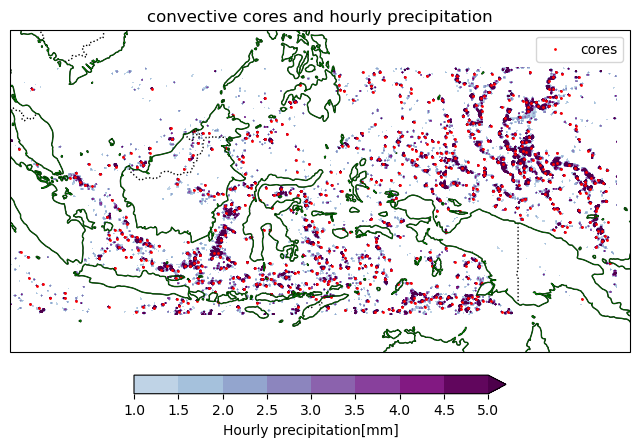

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy

data_proj = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})


ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.OCEAN, color='white', zorder=0)
ax.add_feature(cartopy.feature.LAND, color='white',zorder=0, 
               linewidth=0.5, edgecolor='green')    
ax.coastlines(resolution='50m', linewidth=0.5, color='green')


# set extent
ax.set_extent([100, 150, -13, 13], crs=ccrs.PlateCarree())

# add title and legend
ax.set_title('convective cores and hourly precipitation')

# the following is to 
#ax.set_title('convective cores')
# c = ax.contourf(conv_regions.lon, conv_regions.lat,conv_regions*3600 > 5, cmap='Greys_r', #autumn_r', 
#                 vmin = 0,
#                 vmax = 1,
#                 levels=[1,1.5,2,5,10,15,20],
#                extend='max',transform=data_proj)
# c = ax.contourf(
#     conv_regions.lon, conv_regions.lat,
#     (conv_regions * 3600 > 5).astype(int),  # 转成 0/1 整数
#     cmap='Greys',
#     levels=[-0.5, 0.5, 1.5],  # 区分 0 和 1 的色阶
#     transform=data_proj
# )
conv_hourly = conv_regions * 3600

c = ax.contourf(
    conv_regions.lon, conv_regions.lat,
    conv_hourly,
    cmap='BuPu',
    levels=[1, 1.5, 2,2.5,3,3.5,4,4.5, 5],
    vmin=0,
    vmax=5,
    extend='max',
    transform=data_proj
)

# plot 
ax.scatter(core_snap0[:,2], core_snap0[:,1], color='red', s=1, transform=ccrs.PlateCarree(), label='cores')
cbar = plt.colorbar(c,pad=0.05,orientation='horizontal',shrink=0.6)
cbar.set_label('Hourly precipitation[mm]')
ax.legend()
plt.savefig('/g/data/w28/ym7079/Hackthon/DOC/hk25-AusNode-DOCmeso/get_metrics/Yinglin/ICON_cores/iorg_2020-04-01_00.png',dpi=300, bbox_inches='tight', transparent=False,format='png')
plt.show()